# Coursework 1

Name: Xinyao Qian
Student Number: 19021373
test

#### Import packages and datasets

In [1]:
#Import package
import pandas as pd
import datetime as dt

In [40]:
# import dataset

df = pd.read_csv("Prepared_data.csv")
df['Date']=pd.to_datetime(df['Date'],format="%Y/%m/%d")
df['month'] = df['Date'].dt.month

In [29]:
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day,Day_night,month
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,Yes,Night,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,Yes,Night,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,Yes,Night,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,Yes,Night,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,Yes,Night,12


In [16]:
m = [12,1,2,3,4,5,6,7,8,9,10,11]
mapping = {month: i for i, month in enumerate(m)}
key = df['month'].map(mapping)
ndf = df.iloc[key.argsort()]
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     8760 non-null   datetime64[ns]
 1   Rented Bike Count        8760 non-null   int64         
 2   Hour                     8760 non-null   int64         
 3   Temperature              8760 non-null   float64       
 4   Humidity(%)              8760 non-null   int64         
 5   Wind speed (m/s)         8760 non-null   float64       
 6   Visibility (10m)         8760 non-null   int64         
 7   Solar Radiation (MJ/m2)  8760 non-null   float64       
 8   Rainfall(mm)             8760 non-null   float64       
 9   Snowfall (cm)            8760 non-null   float64       
 10  Seasons                  8760 non-null   object        
 11  Functioning Day          8760 non-null   object        
 12  Day_night                8760 non-

<AxesSubplot:>

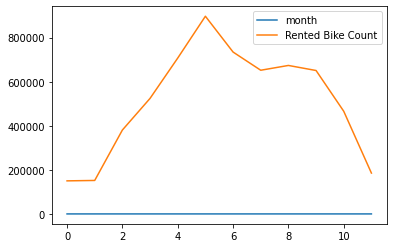

In [25]:
ndf = df.groupby('month')['Rented Bike Count'].sum().reset_index('month')
m = [12,1,2,3,4,5,6,7,8,9,10,11]
mapping = {month: i for i, month in enumerate(m)}
key = ndf['month'].map(mapping)
ndf.iloc[key.argsort()]
ndf.plot()

In [47]:
dff = df[df["month"] == 11]
dff.info()
dff.groupby('Date')['Rented Bike Count'].sum().reset_index('Date')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 8040 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     720 non-null    datetime64[ns]
 1   Rented Bike Count        720 non-null    int64         
 2   Hour                     720 non-null    int64         
 3   Temperature              720 non-null    float64       
 4   Humidity(%)              720 non-null    int64         
 5   Wind speed (m/s)         720 non-null    float64       
 6   Visibility (10m)         720 non-null    int64         
 7   Solar Radiation (MJ/m2)  720 non-null    float64       
 8   Rainfall(mm)             720 non-null    float64       
 9   Snowfall (cm)            720 non-null    float64       
 10  Seasons                  720 non-null    object        
 11  Functioning Day          720 non-null    object        
 12  Day_night                720 non

,Date,Rented Bike Count
0,2018-11-01,22964
1,2018-11-02,24077
2,2018-11-03,0
3,2018-11-04,20471
4,2018-11-05,23472
5,2018-11-06,0
6,2018-11-07,16525
7,2018-11-08,1721
8,2018-11-09,0
9,2018-11-10,18473


In [30]:
# Print the number of rows and columns in the DataFrame
print('No. of columns = ',len(df.columns))
print('No. of rows = ',len(df))
print(df.shape)

No. of columns =  14
No. of rows =  8760
(8760, 14)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     8760 non-null   datetime64[ns]
 1   Rented Bike Count        8760 non-null   int64         
 2   Hour                     8760 non-null   int64         
 3   Temperature              8760 non-null   float64       
 4   Humidity(%)              8760 non-null   int64         
 5   Wind speed (m/s)         8760 non-null   float64       
 6   Visibility (10m)         8760 non-null   int64         
 7   Solar Radiation (MJ/m2)  8760 non-null   float64       
 8   Rainfall(mm)             8760 non-null   float64       
 9   Snowfall (cm)            8760 non-null   float64       
 10  Seasons                  8760 non-null   object        
 11  Functioning Day          8760 non-null   object        
 12  Day_night                8760 non-

#### Check for null values

In [32]:
# Actual unique dates in dataframe:
df['Date'].value_counts()

2017-12-01    24
2018-08-09    24
2018-08-07    24
2018-08-06    24
2018-08-05    24
              ..
2018-03-31    24
2018-03-30    24
2018-03-29    24
2018-03-28    24
2018-11-30    24
Name: Date, Length: 365, dtype: int64

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Check Basic stats

In [35]:
df.groupby('month')['Rented Bike Count'].sum()

month
1     150006
2     151833
3     380594
4     524227
5     707088
6     896887
7     734460
8     651887
9     673612
10    650675
11    465715
12    185330
Name: Rented Bike Count, dtype: int64

#### Daily rents throughout the year

In [33]:
df.groupby('Date')['Rented Bike Count'].sum()

Date
2017-01-12     9539
2017-02-12     8523
2017-03-12     7222
2017-04-12     8729
2017-05-12     8307
              ...  
2018-12-07    29428
2018-12-08    17498
2018-12-09    31809
2018-12-10    26237
2018-12-11    21003
Name: Rented Bike Count, Length: 365, dtype: int64

 From the plot, we can roughly see that the highest
 amount of rents was between June 2018 and July 2018. We
 want to explore it further to see the linkage of
 rents with the season.

#### Exploring the relationship between total rented bike count and seasons
Sum the 'Rented Bike Count' by 'Seasons' and plot the bar
chart in ascending order.

In [18]:

seasons = df.groupby('Seasons')['Rented Bike Count'].sum().reset_index(name ='Total Amount')
seasons.head()

,Seasons,Total Amount
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


The result was the same as that would be expected,
that summer was
 the
season with the highest rent count while winter had the
lowest amount.

#### Splitting Summer data

In [78]:
df_summer = df.loc[df['Seasons'] == 'Summer']
df_summer.reset_index(drop=True, inplace=True)
df_summer.head(1)

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day
0,2018-01-06,963,0,20.1,63,1.1,1698,0.0,0.0,0.0,Summer,Yes


In [79]:
df_summer.tail(1)

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day
2207,2018-08-31,1329,23,23.8,81,0.6,1893,0.0,0.0,0.0,Summer,Yes


From the head and tail of the summer dataframe, the
summer was from 2018-01-06 to 2018-08-31. The result was
also consistent with the 'Daily_total_rents.jpg' where
 the
highest amount happened.

#### Exploring average bike count rented per hour

In [22]:

hour=df.groupby('Hour').sum()['Rented Bike Count'].reset_index(name ='Total Amount')
hour.head()
#df.groupby('Hour').sum()['Rented Bike Count'].plot.bar(color='pink')

,Hour,Total Amount
0,0,197633
1,1,155557
2,2,110095
3,3,74216
4,4,48396


#### Split daytime and night-time
To define whether the hour is daytime or night , we assumed
6:00 - 19:00 as daytime, and created a function to
determine the category.

In [ ]:
# Function to define the Day and Night
def day_or_night(rows):
    """Takes in a number rows, returns category of n"""
    if rows['Hour'] >19 or rows['Hour']<6:
        val = 'Night'
    else:
        val = 'Day'
    return val
# Creat a new column in the dataframe
df['Day_night'] = df.apply(day_or_night, axis=1)
#Plot
day_night = df.groupby('Day_night').sum()['Rented Bike Count'].plot.pie()
day_night.figure.savefig('Plots/Day_night_total_rents.jpg')

In [ ]:
df.head()


#### Exploring relationship between rented bike count and temperature

In [ ]:
temp_rent = df.groupby('Temperature').mean()['Rented Bike Count'].plot(figsize=(40,10),color="lightpink")

temp_rent.figure.savefig('Plots/Temp_average.jpg')

#### Exploring relationship between rented bike count and
#### snowfall

In [ ]:
snow_rent = df.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()
snow_rent.figure.savefig('Plots/Snow_average.jpg')

In [ ]:

df.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()


#### Identify outliers

In [ ]:
bp = df.plot.box(subplots=True)
plt.show()

We shall investigate the outlier in Rented bike box plot

In [ ]:
outlier_bike = df[df['Rented Bike Count']>2400]
outlier_bike['Hour'].unique()

We can see the outliers in the bike count were due to the
high demand for bikes in rush hours and consistent with
the Hour_average.jpg plot, we decided not to remove those
 data.
